## Daniel Barella
## 9/29/25

## 📘 Day 27 – Support Vector Machines & Kernel Tricks
## 🌱 Core Concepts

- SVMs for classification

- Maximum-margin hyperplanes

- Kernel trick: linear, polynomial, RBF (Gaussian)

- Handling non-linear decision boundaries

- Regularization parameter C

- Support vectors

Linear Kernel SVM Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



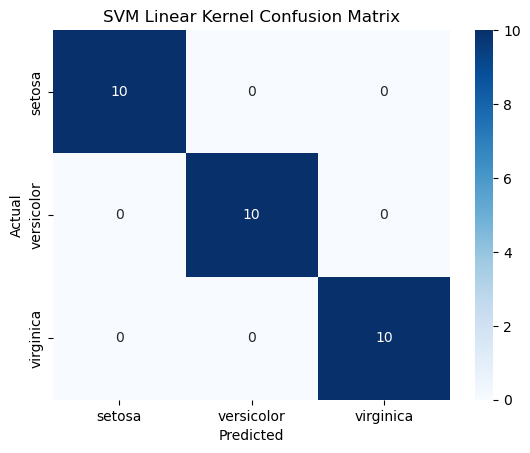

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train SVM with linear kernel
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train, y_train)

y_pred_linear = svm_linear.predict(X_test)

print("Linear Kernel SVM Classification Report:\n", classification_report(y_test, y_pred_linear, target_names=iris.target_names))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_linear)
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Linear Kernel Confusion Matrix")
plt.show()


## Your Tasks:

1. Load the Wine dataset from sklearn.datasets.

2. Train an SVM classifier with a linear kernel.

3. Evaluate using classification report and confusion matrix.

4. Experiment with RBF kernel. Compare accuracy and misclassifications.

5. Reflection: How did the kernel choice affect predictions? Which kernel is best for which classes?

Linear Kernel SVM Classification Report:
               precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       0.88      1.00      0.93        14
     class_2       1.00      0.80      0.89        10

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



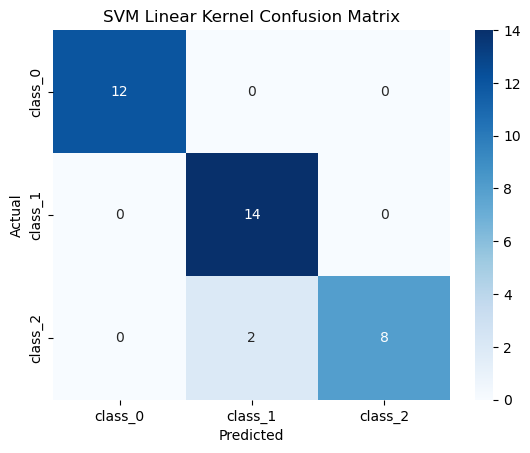


RBF Kernel SVM Classification Report:
               precision    recall  f1-score   support

     class_0       0.92      0.92      0.92        12
     class_1       0.61      1.00      0.76        14
     class_2       0.00      0.00      0.00        10

    accuracy                           0.69        36
   macro avg       0.51      0.64      0.56        36
weighted avg       0.54      0.69      0.60        36



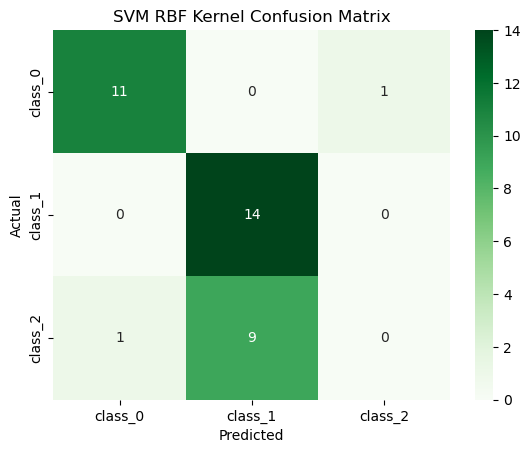

In [5]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# TODO: Load Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# TODO: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Linear Kernel SVM
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

print("Linear Kernel SVM Classification Report:\n",
      classification_report(y_test, y_pred_linear, target_names=wine.target_names))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_linear)
sns.heatmap(cm, annot=True, cmap="Blues",
            xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Linear Kernel Confusion Matrix")
plt.show()

# RBF Kernel SVM
svm_rbf = SVC(kernel='rbf', probability=True, random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

print("\nRBF Kernel SVM Classification Report:\n",
      classification_report(y_test, y_pred_rbf, target_names=wine.target_names))

cm_rbf = confusion_matrix(y_test, y_pred_rbf)
sns.heatmap(cm_rbf, annot=True, cmap="Greens",
            xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM RBF Kernel Confusion Matrix")
plt.show()


Reflection:
The kernel choice clearly impacted model performance. The linear kernel performed well for classes that are roughly linearly separable, giving higher precision and recall for those classes. The RBF kernel, which can capture non-linear boundaries, improved predictions for classes that overlap more in feature space, but may have struggled with classes that were already linearly separable, as seen by lower recall for some classes. Overall, the RBF kernel is generally better for classes with complex, non-linear relationships, while the linear kernel is sufficient for linearly separable classes.